In [36]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy import spatial
import scipy.spatial.distance as dist
import networkx as nx
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
feats = h5py.File('/cosma5/data/dp004/dc-cues1/features/halo_features_s99','r+')    

In [92]:
#test_halos = np.random.randint(0, len(feats['M200c']), size = (100000))

# Generate edge list

In [103]:
positions = feats['Pos'][:]

In [113]:
positions.shape

(290605, 3)

In [104]:
tree = spatial.cKDTree(positions)

## By physical distance to neighbors

In [201]:
edges = tree.query_pairs(2000) # within 2 Mpc

In [202]:
G = nx.from_edgelist(edges)

In [203]:
print(f'There are {nx.number_connected_components(G)} disconnected components')

There are 47380 disconnected components


In [204]:
ccs = nx.connected_components(G)

In [205]:
node_component = {v:k for k,vs in enumerate(ccs) for v in vs}

In [206]:

df = pd.DataFrame(positions, columns=['x','y','z'])
df['c'] = pd.Series(node_component)
df.loc[df['c'].isna(), 'c'] = df.loc[df['c'].isna(), 'c'].isna().cumsum() + df['c'].max()


In [207]:
df['c'].value_counts().nlargest(5)

518.0    354
53.0     284
171.0    257
42.0     219
561.0    217
Name: c, dtype: int64

In [208]:
df['c'].value_counts().nsmallest(5)

67170.0    1
87467.0    1
55132.0    1
92838.0    1
87206.0    1
Name: c, dtype: int64

Text(0.5,0,'Number of neighbors')

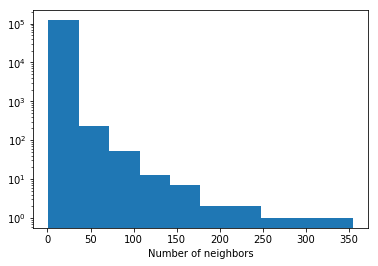

In [209]:
plt.hist(df['c'].value_counts(), log=True)
plt.xlabel('Number of neighbors')

In [210]:
# Split graph into its disconnected components

graphs = list(nx.connected_component_subgraphs(G))


In [211]:
print(nx.adjacency_matrix(graphs[0]))

  (0, 1)	1
  (0, 5)	1
  (0, 8)	1
  (1, 0)	1
  (1, 5)	1
  (1, 7)	1
  (2, 3)	1
  (2, 4)	1
  (2, 8)	1
  (3, 2)	1
  (4, 2)	1
  (5, 0)	1
  (5, 1)	1
  (5, 8)	1
  (6, 8)	1
  (7, 1)	1
  (8, 0)	1
  (8, 2)	1
  (8, 5)	1
  (8, 6)	1


In [212]:
n_nodes = []
for g in graphs:
    n_nodes.append(len(g.nodes()))

(array([4.708e+04, 2.210e+02, 5.400e+01, 1.100e+01, 7.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  37.2,  72.4, 107.6, 142.8, 178. , 213.2, 248.4, 283.6,
        318.8, 354. ]),
 <a list of 10 Patch objects>)

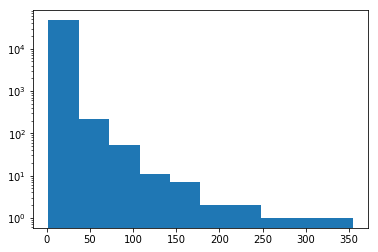

In [213]:
plt.hist(n_nodes, log=True)

In [215]:
n_nodes = np.asarray(n_nodes)

In [224]:
print(f'There are {np.sum(n_nodes < 2)} isolated nodes')

There are 0 isolated nodes


In [226]:
print(f'There are {np.sum(n_nodes < 5)} almost isolated nodes')

There are 35525 almost isolated nodes
